In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split

In [2]:
pd.options.mode.chained_assignment = None # desactivar pandas warnings

In [3]:
# se importan los datasets

df_1=pd.read_parquet("Datasets/df_1.parquet")
df=pd.read_csv("Datasets/df.csv")

## Datasets

In [4]:
# Datasets de las plataformas
df.head(2)

,id,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,plataforma,duration_int,duration_type
0,as1,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,r,comedy,a small fishing village must procure a local d...,amazon,113.0,min
1,as2,s2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,tv shows,a metro family decides to fight a cyber crimin...,amazon,110.0,min


In [5]:
df=df[['id', 'title']]
df

,id,title
0,as1,the grand seduction
1,as2,take care good night
2,as3,secrets of deception
3,as4,pink: staying true
4,as5,monster maker
...,...,...
22993,hs3069,star trek: the original series
22994,hs3070,star trek: voyager
22995,hs3071,the fades
22996,hs3072,the twilight zone


In [6]:
# Dataset de los scores a las peliculas/series 

df_1.head(4)

,user,score,id,plataforma,year_scored
0,1,1.0,as680,amazon,2015
1,1,4.5,ns2186,netflix,2015
2,1,5.0,hs2381,hulu,2015
3,1,5.0,ns3663,netflix,2015


In [7]:
# Se elimina la variable 'year_scored' del dataframe

df_1=df_1[['user', 'id', 'score']]
df_1

,user,id,score
0,1,as680,1.0
1,1,ns2186,4.5
2,1,hs2381,5.0
3,1,ns3663,5.0
4,1,as9500,5.0
...,...,...,...
11024284,124380,ns5272,4.5
11024285,124380,ns5492,2.5
11024286,124380,hs305,3.5
11024287,124380,ns7881,4.5


## Modelo

Se lee y analiza el conjuntos de datos de las calificaciones. La escala de calificación se establece en un mínimo de 0.5 y un máximo de 5, con incrementos de 0.5 unidades.<br>
Por el tamaño del dataset, se genera un umbral. 

In [8]:
# Se modela df_1 con el total de los valores de score. 
# Se establece un limite de 100000 datos para df_1. 

lim = 100000 

reader = Reader(rating_scale=(0.5,5))

data = Dataset.load_from_df(df_1[:lim], reader)

In [9]:
# se separa los datos

trainset, testset = train_test_split(data, test_size=0.25)

In [10]:
# Se instancia y se entrena el modelo SVD 

modelo_svd = SVD()

# Se entrena el modelo

modelo_svd.fit(trainset)

In [11]:
# Se realiza una predicción con los datos testeados

predic = modelo_svd.test(testset)

## Predicción a usuario

In [12]:
# Se realiza una predicción a un id y un score determinado

user_id = '66258'
movie_id = 'ds1370'
r_ui = 4
modelo_svd.predict(user_id, movie_id, r_ui=r_ui, verbose=True)

user: 66258      item: ds1370     r_ui = 4.00   est = 3.53   {'was_impossible': False}


Prediction(uid='66258', iid='ds1370', r_ui=4, est=3.530246913275251, details={'was_impossible': False})

In [13]:
# Se toma un usuario aleatorio para hacerle una recomendación

user_azar=df_1.sample(1)
user_azar

,user,id,score
3813805,39742,as1926,5.0


In [14]:
usuario = 12455

rating = 4 # Se toma  películas a las que haya calificado con 4 o 5 estrellas

df_user = df_1[(df_1['user'] == usuario) & (df_1['score'] >= rating)]
df_user = df_user.reset_index(drop=True)
df_user

,user,id,score
0,12455,hs2245,4.5
1,12455,as8452,4.5
2,12455,ns2942,4.0
3,12455,ns4141,5.0
4,12455,as1382,4.5
...,...,...,...
119,12455,as1274,5.0
120,12455,as8759,5.0
121,12455,ns4183,4.5
122,12455,ns1420,5.0


In [15]:
# se crea un dataframe con  el id pelicula y el titulo de df

df_pelicula = df

# Se une los dos dataframe por el id para ver el nombre de la id de la pelicula.

df_user=pd.merge(df_user,df_pelicula,how='inner',on='id') 

print (f'Las peliculas que el usuario {usuario} calificó por arriba de 4 en el score a {len(df_user)} películas') 
df_user

Las peliculas que el usuario 12455 calificó por arriba de 4 en el score a 124 películas


,user,id,score,title
0,12455,hs2245,4.5,the act
1,12455,as8452,4.5,a war
2,12455,ns2942,4.0,locke & key
3,12455,ns4141,5.0,lego marvel super heroes: guardians of the galaxy
4,12455,as1382,4.5,paradise canyon - digitally remastered
...,...,...,...,...
119,12455,as1274,5.0,power douglas
120,12455,as8759,5.0,act 2 - title 6
121,12455,ns4183,4.5,soni
122,12455,ns1420,5.0,last tango in halifax


Se crea un sample de 5000 películas para recomendar al usuario.

In [16]:
# Muestra de 5000 peliculas

peli_recomienda=df.sample(5000)
peli_recomienda=peli_recomienda.reset_index(drop=True)
peli_recomienda

,id,title
0,hs2802,bakuman
1,ns1404,double dad
2,ns602,the karate kid
3,ns1187,b: the beginning
4,ns3610,let's eat 2
...,...,...
4995,ns3929,persona
4996,ns538,terrace house: opening new doors
4997,as4187,telephone operator
4998,as6776,kaakum karangal


In [17]:
#Se valida cuales de la muestra el usuario ya  ha visto

usuario_vistas = df_1[df_1['user'] == usuario].reset_index()
print(f'el usuario {usuario} ha visto y calificado {len(usuario_vistas)} peliculas')
usuario_vistas

el usuario 12455 ha visto y calificado 144 peliculas


,index,user,id,score
0,1212341,12455,hs2245,4.5
1,1212342,12455,as857,2.5
2,1212343,12455,as8452,4.5
3,1212344,12455,ns367,3.5
4,1212345,12455,hs290,1.5
...,...,...,...,...
139,1212480,12455,as8759,5.0
140,1212481,12455,ns4183,4.5
141,1212482,12455,ns1420,5.0
142,1212483,12455,ns1329,4.0


In [18]:
# Se elimina del sample de 5000 peliculas que elusuario ha visto

peli_recomienda = peli_recomienda[~peli_recomienda['id'].isin(usuario_vistas['id'])]
peli_recomienda

,id,title
0,hs2802,bakuman
1,ns1404,double dad
2,ns602,the karate kid
3,ns1187,b: the beginning
4,ns3610,let's eat 2
...,...,...
4995,ns3929,persona
4996,ns538,terrace house: opening new doors
4997,as4187,telephone operator
4998,as6776,kaakum karangal


In [19]:
# Se crea la columna de recomendaciones

peli_recomienda['Esti_Score'] = peli_recomienda['id'].map(lambda x: modelo_svd.predict(usuario, x).est)
peli_recomienda.sort_values('Esti_Score', ascending=False)

,id,title,Esti_Score
3803,as4817,100 days to live,4.021931
4622,ns4841,bad genius,3.974307
3164,as5656,knives out,3.940270
3135,ns887,the mystic river,3.928113
1281,as2905,carriers,3.907818
...,...,...,...
4398,ns3361,tomorrow with you,3.090267
4674,ns5072,harith iskander: i told you so,3.037076
332,ds701,coco (in spanish),3.026944
2474,as6464,doors wide open,3.021076


## Evaluación del modelo

In [20]:
from surprise.model_selection import cross_validate
from surprise import accuracy

In [21]:
# Se Evalua el modelo desarollado

accuracy.rmse(predic)

RMSE: 0.9576


0.9576124066120139

In [22]:
cross_validate(modelo_svd, data, measures=['RMSE', 'MAE'], cv = 3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9607  0.9590  0.9615  0.9604  0.0010  
MAE (testset)     0.7479  0.7464  0.7506  0.7483  0.0018  
Fit time          1.80    1.80    1.83    1.81    0.01    
Test time         0.56    0.46    0.44    0.49    0.06    


{'test_rmse': array([0.96071859, 0.95903225, 0.96147443]),
 'test_mae': array([0.74789858, 0.74635844, 0.75064856]),
 'fit_time': (1.7998828887939453, 1.8031203746795654, 1.8291015625),
 'test_time': (0.5635998249053955, 0.4551851749420166, 0.4374864101409912)}

## Optimización de hiperparámetros

Se plantea la optimización para todo el dataframe df_1. Sin utilizar el umbral

In [23]:
rmse_test_means = []
factores = [1,2,4,8,16,32,64,128]

for factor in factores:
    print(factor)
    model = SVD(n_factors=factor)
    cv = cross_validate(model, data, measures=['RMSE'], cv = 3, verbose=True)
    rmse_test_means.append(np.mean(cv['test_rmse']))

1
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9493  0.9476  0.9517  0.9495  0.0017  
Fit time          0.90    0.97    0.80    0.89    0.07    
Test time         0.69    0.48    0.56    0.58    0.08    
2
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9541  0.9499  0.9468  0.9503  0.0030  
Fit time          0.80    0.75    0.78    0.78    0.02    
Test time         0.44    0.61    0.42    0.49    0.08    
4
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9476  0.9491  0.9557  0.9508  0.0035  
Fit time          0.78    0.88    0.85    0.83    0.04    
Test time         0.44    0.61    0.47    0.51    0.08    
8
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9565  0.9

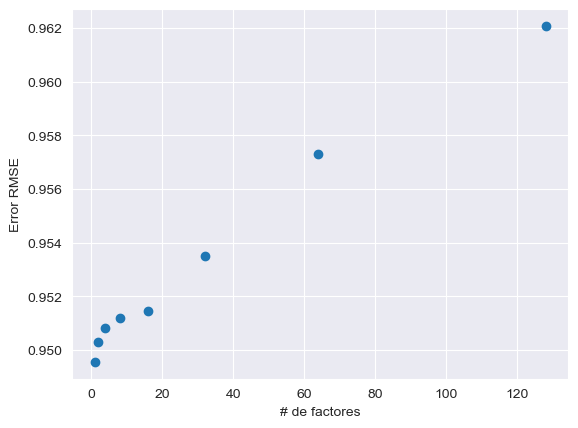

In [24]:
# Tema para los graficos
sns.set_style("darkgrid")

# Se Plotea el  desempeño según cantidad de factores de SVD

plt.scatter(factores, rmse_test_means)
plt.xlabel('# de factores')
plt.ylabel('Error RMSE')
plt.show()

## Interfaz Modelo

In [25]:
import gradio as gr

Se genera funcciones para mejorar la consulta de nuestro modelo. Se desarrolla una interfax para el sistema utilizando  la libreria Gradio


In [26]:
# Creo una función para averiguar el nombre de película 

def get_titulo_movie(id):
    return df[df.id == id].title.iloc[0].title()

get_titulo_movie('as2340')


"Girls' Last Tour"

In [27]:
def movie_recomenda(user, movieid):
    # Se obtiene la predicción de la calificación que el usuario le daría a la película
    prediction = modelo_svd.predict(user, str(movieid))

    # Si la predicción es mayor o igual a 3.7, se recomienda la película
    if prediction.est >= 3.7:
        return "Recomendada", prediction.est
    else:
        return "No recomendada", prediction.est

movie_recomenda(1,'ns65')    

('Recomendada', 4.137028990448383)

In [28]:
# Se unifica las dos funciones 

def functions(userid, id):
    recommended, score = movie_recomenda(userid, id)
    title = get_titulo_movie(id)
    return (recommended, score, title)

In [30]:
title = str("Recomendación de movies/series")

with gr.Blocks(title= title) as demo:
    text = gr.components.HTML("""<h1>Modelo de recomendación de películas</h1>""")
    userid = gr.Number(label="id de usuario")
    id = gr.Textbox(label="id de la película")
    get_recommendation_btn = gr.Button("La película seleccionada es:")
    title = gr.Textbox(label = "Nombre de la película:")
    output = gr.Textbox(label="¿La película seleccionada es recomendada para tí?")
    score = gr.Textbox(label="Puntaje:")
    get_recommendation_btn.click(fn=functions, inputs=[userid,id], outputs=[output, score, title])

demo.launch(share=True)

Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://e6a43a4973ab65d44d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
